#### 1. Two independent normally distributed sets of numbers

e.g. two different servers with different characteristics

In [45]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# hide warnings from sns.distplot
import warnings
warnings.filterwarnings('ignore')

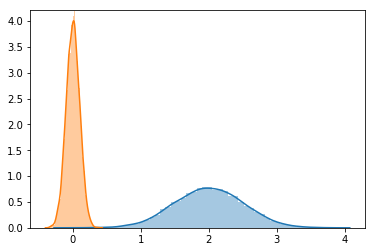

In [46]:
mu, sigma = 0, 0.1 # mean and standard deviation
dist1 = np.random.normal(mu, sigma, 10000)

mu, sigma = 2, 0.5 # mean and standard deviation
dist2 = np.random.normal(mu, sigma, 10000)
sns.distplot(dist2, bins=50)
sns.distplot(dist1, bins=50)

#### 2. Random choice between two normally distributed sets with some probability

e.g. Server with fast cache. With some probability we get answer from cache.

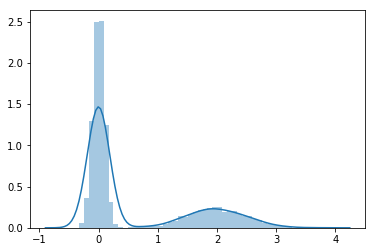

In [49]:

mu, sigma = 0, 0.1 # mean and standard deviation
dist1 = np.random.normal(mu, sigma, 10000)

mu, sigma = 2, 0.5 # mean and standard deviation
dist2 = np.random.normal(mu, sigma, 10000)


p = 0.7
dist3 = []
for v1, v2 in zip(dist1, dist2):
    if np.random.uniform(0, 1) < p:
        dist3.append(v1)
    else:
        dist3.append(v2)

sns.distplot(dist3, bins=50)

#### 3. Poisson process

Generate exponentialy distributed interarrival times and see that number events at moment t has poisson distribution

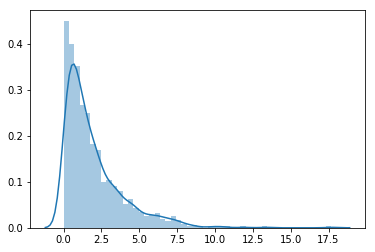

In [52]:
interarrivals = np.random.exponential(scale=2.0, size=1000)
sns.distplot(interarrivals, bins=50)

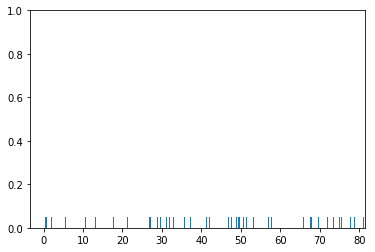

In [58]:
interarrivals = np.random.exponential(scale=2.0, size=1000)

points = []
last_time = 0
for wait_time in interarrivals:
    last_time += wait_time
    points.append(last_time)
                 
sns.rugplot(points[:40])

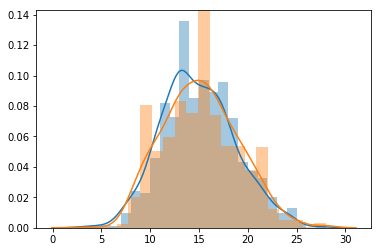

In [66]:
def run_poisson_process(scale=2.0, window_size=100):
    last_time = 0
    points = []
    while last_time < window_size:
        last_time += np.random.exponential(scale=scale)
        points.append(last_time)
    return points

a, b = 20, 50

# Random variable - number of events within interval (a, b)
dist = [
   sum(a <= x <= b for x in run_poisson_process())
   for _ in range(1000)
]

# Expected pdf 
expected = np.random.poisson((b-a)/2.0, 1000)

sns.distplot(dist)
sns.distplot(expected)